In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import seaborn as sns
from sklearn import preprocessing
import scipy as sp

In [2]:
#Import Dataset
df = pd.read_csv('NYPD_Complaint_Data_Current__Year_To_Date.csv')
df.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,244685801,69,BROOKLYN,01/01/2015,00:00:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,<18,BLACK,F,1010541,175595,40.648614,-73.905257,"(40.6486135510607, -73.9052572032302)",POINT (-73.9052572032302 40.6486135510607)
1,242250195,42,BRONX,03/17/2022,15:23:00,03/17/2022,15:28:00,ATTEMPTED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,D,1010419,242374,40.831899,-73.905435,"(40.831899, -73.905435)",POINT (-73.905435 40.831899)
2,242385774,123,STATEN ISLAND,03/20/2022,11:52:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,45-64,WHITE,F,926029,138052,40.545405,-74.209485,"(40.545405, -74.209485)",POINT (-74.209485 40.545405)
3,242643555,121,STATEN ISLAND,03/24/2022,15:00:00,03/24/2022,22:00:00,COMPLETED,(null),NaN,...,NaN,18-24,BLACK,F,942822,166353,40.623188,-74.149238,"(40.6231883776008, -74.1492376947323)",POINT (-74.1492376947323 40.6231883776008)
4,242816732,42,BRONX,03/29/2022,15:24:00,03/29/2022,15:30:00,COMPLETED,(null),NaN,...,NaN,45-64,BLACK,M,1010131,240105,40.825670,-73.906484,"(40.82567, -73.906484)",POINT (-73.906484 40.82567)


## Variables Dictionary :
### Expand the cell below to view the variables dictionary.

> **CMPLNT_NUM** - Randomly generated persistent ID for each complaint
> 
> **ADDR_PCT_CD** - The precinct in which the incident occurred
> 
> **BORO** - The name of the borough in which the incident occurred
> 
> **CMPLNT_FR_DT** - Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)
> 
> **CMPLNT_FR_TM** - Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)
> 
> **CMPLNT_TO_DT** - Ending date of occurrence for the reported event, if exact time of occurrence is unknown
> 
> **CMPLNT_TO_TM** - Ending time of occurrence for the reported event, if exact time of occurrence is unknown
> 
> **CRM_ATPT_CPTD_CD** - Indicator of whether crime was successfully completed or attempted, but failed or was interrupted prematurely
> 
> **HADEVELOPT** - Name of NYCHA housing development of occurrence, if applicable
> 
> **HOUSING_PSA** - Development Level Code
> 
> **JURISDICTION_CODE** - Jurisdiction responsible for incident. Either internal, like Police(0), Transit(1), and Housing(2); or external(3), like Correction, Port Authority, etc.
> 
> **JURIS_DESC** - Description of the jurisdiction code
> 
> **KY_CD** - Three digit offense classification code
> 
> **LAW_CAT_CD** - Level of offense: felony, misdemeanor, violation
> 
> **LOC_OF_OCCUR_DESC** - Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of
> 
> **OFNS_DESC** - Description of offense corresponding with key code
> 
> **PARKS_NM** - Name of NYC park, playground or greenspace of occurrence, if applicable (state parks are not included)
> 
> **PATROL_BORO** - The name of the patrol borough in which the incident occurred
> 
> **PD_CD** - Three digit internal classification code (more granular than Key Code)
> 
> **PD_DESC** - Description of internal classification corresponding with PD code (more granular than Offense Description)
> 
> **PREM_TYP_DESC** - Specific description of premises; grocery store, residence, street, etc.
> 
> **RPT_DT** - Date event was reported to police
> 
> **STATION_NAME** - Transit station name
> 
> **SUSP_AGE_GROUP** - Suspect’s Age Group
> 
> **SUSP_RACE** - Suspect’s Race Description
> 
> **SUSP_SEX** - Suspect’s Sex Description
> 
> **TRANSIT_DISTRICT** - Transit district in which the offense occurred.
> 
> **VIC_AGE_GROUP** - Victim’s Age Group
> 
> **VIC_RACE** - Victim’s Race Description
> 
> **VIC_SEX** - Victim’s Sex Description (D=Business/Organization, E=PSNY/People of the State of New York, F=Female, M=Male)
> 
> **X_COORD_CD** - X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
> 
> **Y_COORD_CD** - Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
> 
> **Latitude** - Midblock Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)
> 
> **Longitude** - Midblock Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)

In [3]:
print("Observations: ", df.shape[0])

print("Variables: ", df.shape[1])

Observations:  256797
Variables:  36


In [4]:
df.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,244685801,69,BROOKLYN,01/01/2015,00:00:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,<18,BLACK,F,1010541,175595,40.648614,-73.905257,"(40.6486135510607, -73.9052572032302)",POINT (-73.9052572032302 40.6486135510607)
1,242250195,42,BRONX,03/17/2022,15:23:00,03/17/2022,15:28:00,ATTEMPTED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,D,1010419,242374,40.831899,-73.905435,"(40.831899, -73.905435)",POINT (-73.905435 40.831899)
2,242385774,123,STATEN ISLAND,03/20/2022,11:52:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,45-64,WHITE,F,926029,138052,40.545405,-74.209485,"(40.545405, -74.209485)",POINT (-74.209485 40.545405)
3,242643555,121,STATEN ISLAND,03/24/2022,15:00:00,03/24/2022,22:00:00,COMPLETED,(null),NaN,...,NaN,18-24,BLACK,F,942822,166353,40.623188,-74.149238,"(40.6231883776008, -74.1492376947323)",POINT (-74.1492376947323 40.6231883776008)
4,242816732,42,BRONX,03/29/2022,15:24:00,03/29/2022,15:30:00,COMPLETED,(null),NaN,...,NaN,45-64,BLACK,M,1010131,240105,40.825670,-73.906484,"(40.82567, -73.906484)",POINT (-73.906484 40.82567)


The dataset contains over 6 million crime reports, with a total of 35 variables each.

After looking at the head of the dataset we were already able to notice some NaN values, therefore we need to examine the missing values further before continuing with the analysis. 

- The `isna()` function will show us the percentage of non-existent values for each variable.

In [5]:
df.replace('(null)',np.nan,inplace= True)


In [6]:
#See the percentege of missing values in each variable
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

HADEVELOPT                  99.682629
PARKS_NM                    99.446645
STATION_NAME                97.777233
TRANSIT_DISTRICT            97.777233
HOUSING_PSA                 93.385826
SUSP_RACE                   19.779047
SUSP_AGE_GROUP              19.779047
SUSP_SEX                    19.779047
LOC_OF_OCCUR_DESC           15.991620
CMPLNT_TO_DT                 7.544481
CMPLNT_TO_TM                 7.523063
BORO_NM                      0.171731
PD_DESC                      0.104752
PD_CD                        0.104752
PREM_TYP_DESC                0.041667
VIC_RACE                     0.028038
OFNS_DESC                    0.002336
PATROL_BORO                  0.001558
X_COORD_CD                   0.000000
VIC_AGE_GROUP                0.000000
Y_COORD_CD                   0.000000
Latitude                     0.000000
Longitude                    0.000000
Lat_Lon                      0.000000
VIC_SEX                      0.000000
CMPLNT_NUM                   0.000000
RPT_DT      

### Data Cleaning

#### Dealing with NaN data

Since some of the columns are pretty important for the analysis, I dropped entire rows which miss any crucial value. For that, I used the `dropNA()` function in Pandas.

The columns I didn't want to drop entire rows, I opted to fill them with the 'UNKNOWN' value (These include variables that contain information about the victims of the crime, such as their age group, race, and gender). I used the `fillNA()` function for that.

It is worth mention that some specific variables have a lot of NaN values, and they don't necessarily have any use in this analysis (like PARKS_NM means the park or public place nearby where crime happened, and columns with information about the suspect are also not going to be important, considering they have a lot of missing data) so I would drop those columns entirely with the `drop()` function.

In [7]:
df["SUSP_RACE"] = df["SUSP_RACE"].astype("category")
df["SUSP_RACE"] = df["SUSP_RACE"].cat.remove_categories("UNKNOWN")

<AxesSubplot:ylabel='SUSP_RACE'>

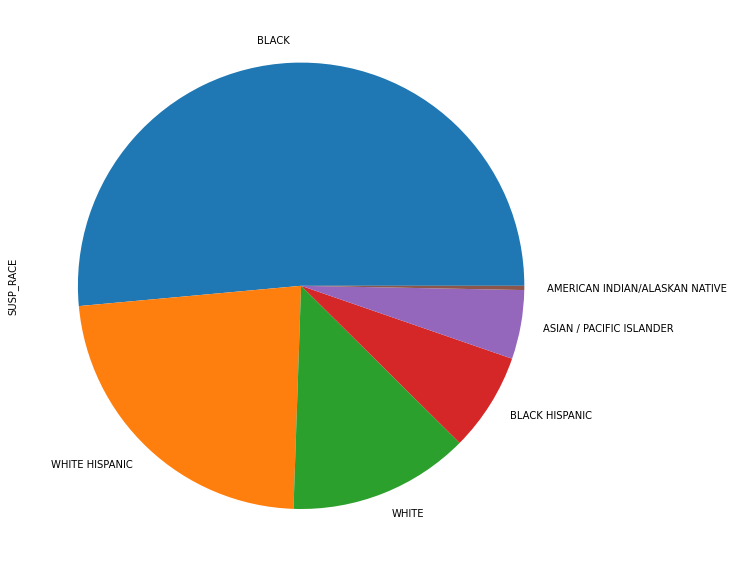

In [8]:
df['SUSP_RACE'].value_counts().plot(kind='pie',figsize=(10,15))

<AxesSubplot:>

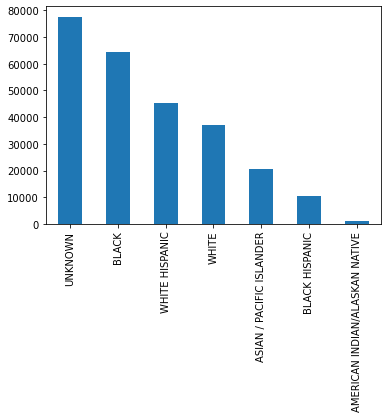

In [9]:
df['VIC_RACE'].value_counts().plot(kind='bar')

In [10]:
#dropping rows with NaN values
df.fillna(np.nan,inplace = True)
df.drop_duplicates(inplace = True)

df.dropna(subset=['Y_COORD_CD','X_COORD_CD','Latitude','Longitude','CRM_ATPT_CPTD_CD','Lat_Lon','OFNS_DESC'], inplace=True)

#dropping columns that are not significant for future data exploration
df.drop(['PARKS_NM','STATION_NAME','TRANSIT_DISTRICT','HADEVELOPT','HOUSING_PSA'],axis='columns', inplace=True)

df.drop(['PREM_TYP_DESC', 'JURISDICTION_CODE'], axis='columns', inplace=True)

df.drop(['ADDR_PCT_CD','PD_CD','PD_DESC','PATROL_BORO'], axis='columns', inplace=True)

#replacing all NaN values in 'LOC_OF_OCCUR_DESC' with UNKNOWN
df.fillna({'LOC_OF_OCCUR_DESC':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_RACE' with UNKNOWN
df.fillna({'VIC_RACE':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_AGE_GROUP' with UNKNOWN
df.fillna({'VIC_AGE_GROUP':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_SEX' with UNKNOWN
df.fillna({'VIC_SEX':'UNKNOWN'}, inplace=True)

print('Clean dataset: ')
print("Observations: ", df.shape[0])
print("Variables: ", df.shape[1])

#examing the changes
df.head(5)

Clean dataset: 
Observations:  256791
Variables:  25


,CMPLNT_NUM,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,JURIS_DESC,KY_CD,LAW_CAT_CD,...,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,244685801,BROOKLYN,01/01/2015,00:00:00,NaN,NaN,COMPLETED,N.Y. POLICE DEPT,104,FELONY,...,M,<18,BLACK,F,1010541,175595,40.648614,-73.905257,"(40.6486135510607, -73.9052572032302)",POINT (-73.9052572032302 40.6486135510607)
1,242250195,BRONX,03/17/2022,15:23:00,03/17/2022,15:28:00,ATTEMPTED,N.Y. POLICE DEPT,105,FELONY,...,M,UNKNOWN,UNKNOWN,D,1010419,242374,40.831899,-73.905435,"(40.831899, -73.905435)",POINT (-73.905435 40.831899)
2,242385774,STATEN ISLAND,03/20/2022,11:52:00,NaN,NaN,COMPLETED,N.Y. POLICE DEPT,578,VIOLATION,...,F,45-64,WHITE,F,926029,138052,40.545405,-74.209485,"(40.545405, -74.209485)",POINT (-74.209485 40.545405)
3,242643555,STATEN ISLAND,03/24/2022,15:00:00,03/24/2022,22:00:00,COMPLETED,N.Y. POLICE DEPT,104,FELONY,...,M,18-24,BLACK,F,942822,166353,40.623188,-74.149238,"(40.6231883776008, -74.1492376947323)",POINT (-74.1492376947323 40.6231883776008)
4,242816732,BRONX,03/29/2022,15:24:00,03/29/2022,15:30:00,COMPLETED,N.Y. POLICE DEPT,105,FELONY,...,M,45-64,BLACK,M,1010131,240105,40.825670,-73.906484,"(40.82567, -73.906484)",POINT (-73.906484 40.82567)


In [11]:
df['SUSP_AGE_GROUP'].replace('UNKNOWN','25-44',inplace=True)
df['SUSP_AGE_GROUP'].value_counts()


25-44    160618
45-64     21985
18-24     16089
<18        4914
65+        2378
2022         11
-74           1
-969          1
-1            1
-5962         1
-961          1
-10           1
-941          1
Name: SUSP_AGE_GROUP, dtype: int64

In [12]:
df= df[~df['SUSP_AGE_GROUP'].isin(['2022', '-74','-969','-1','-5962','-961','-10','-941'])]
df['SUSP_AGE_GROUP'].value_counts()



25-44    160618
45-64     21985
18-24     16089
<18        4914
65+        2378
Name: SUSP_AGE_GROUP, dtype: int64

In [13]:
df['SUSP_RACE'].value_counts()


BLACK                             73576
WHITE HISPANIC                    32899
WHITE                             18749
BLACK HISPANIC                    10206
ASIAN / PACIFIC ISLANDER           7136
AMERICAN INDIAN/ALASKAN NATIVE      436
Name: SUSP_RACE, dtype: int64

In [14]:
df['SUSP_RACE'].replace('UNKNOWN','BLACK',inplace=True)
df['SUSP_RACE'].value_counts()


BLACK                             73576
WHITE HISPANIC                    32899
WHITE                             18749
BLACK HISPANIC                    10206
ASIAN / PACIFIC ISLANDER           7136
AMERICAN INDIAN/ALASKAN NATIVE      436
Name: SUSP_RACE, dtype: int64

In [15]:
df['VIC_AGE_GROUP'].value_counts()


25-44      91080
UNKNOWN    72680
45-64      48711
18-24      21731
65+        12517
<18        10039
-5             2
-65            2
-971           1
-959           1
-955           1
-964           1
-4             1
-960           1
-40            1
-970           1
-934           1
-11            1
-963           1
Name: VIC_AGE_GROUP, dtype: int64

In [16]:
df['VIC_AGE_GROUP'].replace('UNKNOWN','25-44',inplace=True)
df['VIC_AGE_GROUP'].value_counts()


25-44    163760
45-64     48711
18-24     21731
65+       12517
<18       10039
-5            2
-65           2
-934          1
-960          1
-11           1
-970          1
-40           1
-971          1
-4            1
-964          1
-955          1
-959          1
-963          1
Name: VIC_AGE_GROUP, dtype: int64

In [17]:
df= df[~df['VIC_AGE_GROUP'].isin(['-65', '-5','-934','-40','-4','-964','-955','-959','-963'])]
df['VIC_AGE_GROUP'].value_counts()

25-44    163760
45-64     48711
18-24     21731
65+       12517
<18       10039
-11           1
-960          1
-970          1
-971          1
Name: VIC_AGE_GROUP, dtype: int64

In [18]:
df['VIC_RACE'].value_counts()


UNKNOWN                           77642
BLACK                             64427
WHITE HISPANIC                    45312
WHITE                             37170
ASIAN / PACIFIC ISLANDER          20657
BLACK HISPANIC                    10636
AMERICAN INDIAN/ALASKAN NATIVE      918
Name: VIC_RACE, dtype: int64

In [19]:
df['VIC_RACE'].replace('UNKNOWN','BLACK',inplace=True)
df['VIC_RACE'].value_counts()


BLACK                             142069
WHITE HISPANIC                     45312
WHITE                              37170
ASIAN / PACIFIC ISLANDER           20657
BLACK HISPANIC                     10636
AMERICAN INDIAN/ALASKAN NATIVE       918
Name: VIC_RACE, dtype: int64

In [20]:
df.dropna(inplace=True)
df.reset_index(drop= True, inplace=True)


In [21]:
#Extracting the day from date given
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'],errors='coerce',format = "%m/%d/%Y" )
df['CMPLNT_TO_DT'] = pd.to_datetime(df['CMPLNT_TO_DT'],errors='coerce',format = "%m/%d/%Y" )
FR_DY = df['CMPLNT_FR_DT'].dt.day_name()
TO_DY = df['CMPLNT_TO_DT'].dt.day_name()


In [22]:
#concatinating th day column
df = pd.concat([df,FR_DY],axis=1)
df.columns = [*df.columns[:-1], 'CMPLNT_FR_DAY']

In [23]:
#concatinating the dat column
df = pd.concat([df,TO_DY],axis=1)
df.columns = [*df.columns[:-1], 'CMPLNT_TO_DAY']

In [24]:
fr_hr = pd.to_datetime(df['CMPLNT_FR_TM'], format='%H:%M:%S').dt.hour 
to_hr = pd.to_datetime(df['CMPLNT_TO_TM'], format='%H:%M:%S').dt.hour


In [25]:
df = pd.concat([df,fr_hr],axis=1)
df.columns = [*df.columns[:-1], 'CMPLNT_FR_PART']


In [26]:
df = pd.concat([df,to_hr],axis=1)
df.columns = [*df.columns[:-1], 'CMPLNT_TO_PART']


In [27]:
#Defining function to get part the hours
def f(x=0):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'


In [28]:
df['CMPLNT_FR_PART'] = df['CMPLNT_FR_PART'].apply(lambda z: f(z))


In [29]:
df['CMPLNT_TO_PART'] = df['CMPLNT_TO_PART'].apply(lambda z: f(z))


In [30]:
df.OFNS_DESC.unique()

array(['ROBBERY', 'RAPE', 'HARRASSMENT 2', 'FELONY ASSAULT', 'SEX CRIMES',
       'PETIT LARCENY', 'ASSAULT 3 & RELATED OFFENSES',
       'OFF. AGNST PUB ORD SENSBLTY &', 'MISCELLANEOUS PENAL LAW',
       'GRAND LARCENY', 'OTHER STATE LAWS (NON PENAL LA',
       'DANGEROUS WEAPONS', 'CRIMINAL MISCHIEF & RELATED OF', 'BURGLARY',
       'DANGEROUS DRUGS', 'OFFENSES AGAINST PUBLIC ADMINI',
       'CRIMINAL TRESPASS', 'UNAUTHORIZED USE OF A VEHICLE',
       'GRAND LARCENY OF MOTOR VEHICLE', 'OFFENSES AGAINST THE PERSON',
       'POSSESSION OF STOLEN PROPERTY', 'THEFT-FRAUD',
       'ADMINISTRATIVE CODE', 'FORGERY', 'NYS LAWS-UNCLASSIFIED FELONY',
       'OFFENSES INVOLVING FRAUD', 'FRAUDS',
       'INTOXICATED & IMPAIRED DRIVING', 'KIDNAPPING & RELATED OFFENSES',
       'GAMBLING', 'THEFT OF SERVICES', 'VEHICLE AND TRAFFIC LAWS',
       'OTHER OFFENSES RELATED TO THEF', 'ARSON',
       'AGRICULTURE & MRKTS LAW-UNCLASSIFIED',
       'PROSTITUTION & RELATED OFFENSES', 'FRAUDULENT ACCOSTING',

In [31]:
df.drop(columns=['Latitude','Longitude','X_COORD_CD','Y_COORD_CD'],inplace= True)

In [32]:
df.drop(columns=['CMPLNT_FR_DT','CMPLNT_FR_TM','CMPLNT_TO_DT','CMPLNT_TO_TM'],inplace= True)

In [33]:
df_clean = df.replace({'HARRASSMENT 2': 'HARASSMENT', 
                'ESCAPE 3': 'ESCAPE',
                'ASSAULT 3 & RELATED OFFENSES': 'ASSAULT & RELATED OFFENSES',
                'CRIMINAL MISCHIEF & RELATED OF': 'CRIMINAL MISCHIEF',
                'OFF. AGNST PUB ORD SENSBLTY &': 'OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION',
                'OTHER STATE LAWS (NON PENAL LA': 'OTHER STATE LAWS (NON PENAL LAW)',
                'ENDAN WELFARE INCOMP': 'ENDANGERING WELFARE OF INCOMPETENT',
                'AGRICULTURE & MRKTS LAW-UNCLASSIFIED': 'AGRICULTURE & MARKETS LAW',
                'DISRUPTION OF A RELIGIOUS SERV': 'DISRUPTION OF A RELIGIOUS SERVICE',
                'LOITERING/GAMBLING (CARDS, DIC': 'GAMBLING',
                'OFFENSES AGAINST MARRIAGE UNCL': 'OFFENSES AGAINST MARRIAGE',
                'HOMICIDE-NEGLIGENT,UNCLASSIFIE': 'HOMICIDE-NEGLIGENT',
                                      'E': 'UNKNOWN',
                                      'D': 'BUSINESS/ORGANIZATION',
                                      'F': 'FEMALE',
                                      'M': 'MALE'}).copy()

## EDA :

In [34]:
#types of crimes (top 10)
df_clean.OFNS_DESC.value_counts().iloc[:10]

HARASSMENT                                      28338
PETIT LARCENY                                   22836
ASSAULT & RELATED OFFENSES                      20457
FELONY ASSAULT                                   8693
CRIMINAL MISCHIEF                                7068
ROBBERY                                          6038
OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION     5921
GRAND LARCENY                                    5647
MISCELLANEOUS PENAL LAW                          5338
DANGEROUS DRUGS                                  2788
Name: OFNS_DESC, dtype: int64

<AxesSubplot:title={'center':'Types of Crimes'}>

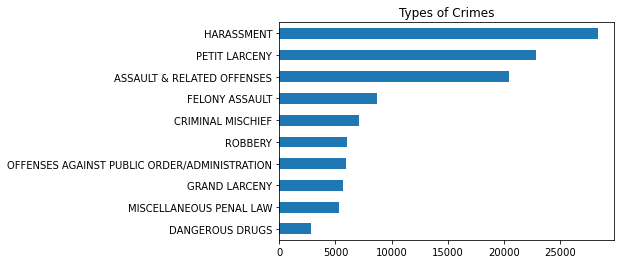

In [35]:
df_clean.OFNS_DESC.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Types of Crimes")

There are three levels of crime in New York State: Violation, Misdemeanor and Felony.

From the graph below, I can tell that Misdemeanor, an offense of which a sentence in excess of 15 days but not greater than one year may be imposed, is the most popular level of crime. The second popular one is Felony, the most serious of offenses, and the third one is Violation, a lesser offense for which a sentence only be no more than 15 days.

array([<AxesSubplot:ylabel='LAW_CAT_CD'>], dtype=object)

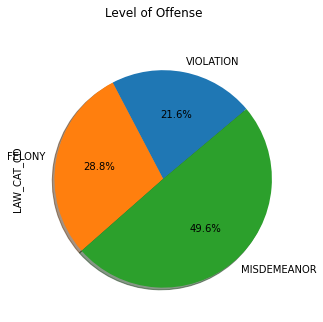

In [36]:
df_clean['LAW_CAT_CD'].value_counts().sort_values().plot(kind='pie', subplots=True, shadow = True,startangle=40,
figsize=(10,5), autopct='%1.1f%%', title = 'Level of Offense')

### 2. Distribution of crimes over the years, months and days

<AxesSubplot:title={'center':'Total Crime Events by Year'}>

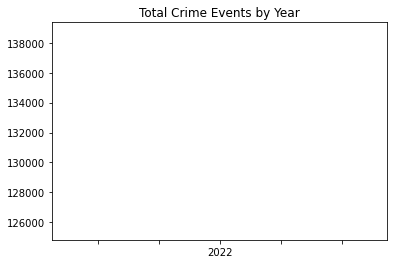

In [37]:
df_clean['year'] = df_clean['RPT_DT'].str.findall(r'(\d{4})').apply(lambda x: x[0])
df_clean['year'].value_counts().plot(kind="line", title = "Total Crime Events by Year")

<AxesSubplot:title={'center':'Total Crime Events by Month'}, xlabel='month'>

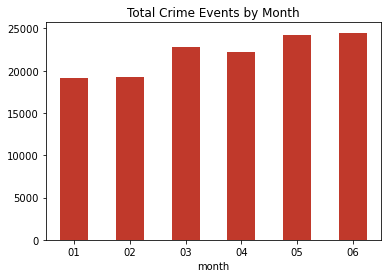

In [38]:
#reports by month
df_clean['month'] = df_clean['RPT_DT'].str.findall('(\d{2})').apply(lambda x: x[0])
df_clean.groupby('month').size().plot(kind = 'bar', title ='Total Crime Events by Month', color = '#C0392B',rot=0)

### 4. Analyzing a Specific Crime

I want to specifically analyze sex related crimes in NYC. For that, I put the part of the dataframe that contains the crime description 'sex crimes' and 'rape' into another dataframe and called it “sex_crimes.”

In [39]:
sex_crimes = df_clean[df.OFNS_DESC.str.contains('SEX CRIMES|RAPE')]
sex_crimes.head()

,CMPLNT_NUM,BORO_NM,CRM_ATPT_CPTD_CD,JURIS_DESC,KY_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,RPT_DT,SUSP_AGE_GROUP,...,VIC_RACE,VIC_SEX,Lat_Lon,New Georeferenced Column,CMPLNT_FR_DAY,CMPLNT_TO_DAY,CMPLNT_FR_PART,CMPLNT_TO_PART,year,month
1,242643555,STATEN ISLAND,COMPLETED,N.Y. POLICE DEPT,104,FELONY,INSIDE,RAPE,03/25/2022,25-44,...,BLACK,FEMALE,"(40.6231883776008, -74.1492376947323)",POINT (-74.1492376947323 40.6231883776008),Thursday,Thursday,Noon,Night,2022,03
6,245415071,BRONX,COMPLETED,N.Y. POLICE DEPT,116,FELONY,INSIDE,SEX CRIMES,05/20/2022,25-44,...,WHITE HISPANIC,FEMALE,"(40.8378421209284, -73.9196277517392)",POINT (-73.9196277517392 40.8378421209284),Tuesday,Saturday,Late Night,Late Night,2022,05
16,242064502,MANHATTAN,COMPLETED,N.Y. POLICE DEPT,104,FELONY,INSIDE,RAPE,03/14/2022,25-44,...,ASIAN / PACIFIC ISLANDER,FEMALE,"(40.7650240788333, -73.9848359497083)",POINT (-73.9848359497083 40.7650240788333),Saturday,Saturday,Morning,Morning,2022,03
17,240947098,BRONX,COMPLETED,N.Y. POLICE DEPT,104,FELONY,INSIDE,RAPE,02/19/2022,25-44,...,WHITE HISPANIC,FEMALE,"(40.8229123084767, -73.8700413043181)",POINT (-73.8700413043181 40.8229123084767),Sunday,Sunday,Evening,Evening,2022,02
19,241709140,QUEENS,COMPLETED,N.Y. POLICE DEPT,233,MISDEMEANOR,INSIDE,SEX CRIMES,03/07/2022,<18,...,BLACK,FEMALE,"(40.7072398161698, -73.7927267255908)",POINT (-73.7927267255908 40.7072398161698),Wednesday,Friday,Noon,Noon,2022,03


#### Analyzing Time

We may be interested in the distribution of values across the years, so I'm going to group the data by year and plot the results.

2827.0


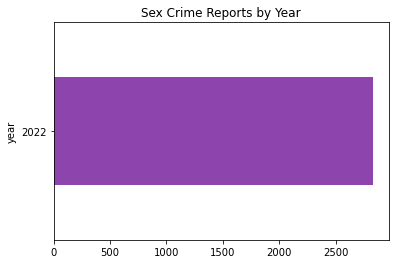

In [40]:
#plot graph
sex_crimes.groupby('year').size().plot(kind = 'barh', color = '#8E44AD', title = 'Sex Crime Reports by Year')

#average sex crimes per year
mean = sex_crimes['year'].value_counts().mean()
print(round(mean,2))

- Based on the bar graph that I computed, sex crimes happened the most during the last 3 years compared to previous years.

- On average, there are 7443 victims of rape and sexual assault each year in New York City.

Let’s also look at how the number of the reports changes within a day.

BLACK                             37.637071
WHITE HISPANIC                    30.491687
WHITE                             15.882561
ASIAN / PACIFIC ISLANDER           9.763000
BLACK HISPANIC                     5.907322
AMERICAN INDIAN/ALASKAN NATIVE     0.318359
Name: VIC_RACE, dtype: float64


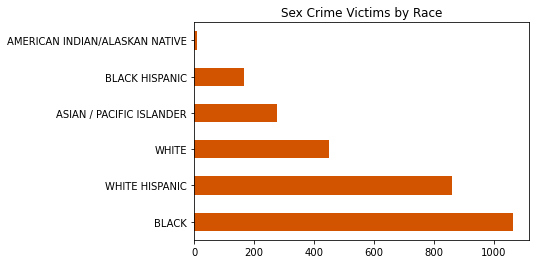

In [41]:
# Sex victims by Race :
sex_crimes['VIC_RACE'].value_counts().iloc[:7].plot(kind="barh", color = '#D35400', title = 'Sex Crime Victims by Race')

#victims by race percentage
vic_race_per = sex_crimes['VIC_RACE'].value_counts().iloc[:7] / sex_crimes['VIC_RACE'].shape[0] *100
print(vic_race_per)